In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy as sp
import networkx as nx
import collections
import time

### Uniform Spanning Tree

A spanning tree of a finite connected graph G is a connected subgraph of G containing every vertex and no cycles.  
(Ref: https://mathweb.ucsd.edu/~jschwein/LERW.pdf)

### Wilson's Algorithm

0. Create empty cells
1. Set the starting position
2. While it's not a spanning tree
    - Perform LERW in a network  
        1) Pick any random position  
        2) Perform a random walk  
        3) Check if the position is already visited  
            -- If yes, erase the loop and restart the walk
            -- If no, add to the trace
        4) Check if the current position is already in the trace

### Version 1.1

In [6]:
# Define a function to perform LERW

def LERW(start_position, goal, dim):
    
    visited_cell = []
    current_position = start_position
    visited_cell.append(current_position)
    while current_position != goal:
        neighbors = [(current_position[0],current_position[1]-1),(current_position[0],current_position[1]+1),
                     (current_position[0]-1,current_position[1]),(current_position[0]+1,current_position[1])] # (left,right,up,down)
        feasible_neighbors = [i for i in neighbors if (i[0] >= 0 and i[0] <= dim-1) and (i[1] >= 0 and i[1] <= dim-1)]
        next_position = random.choice(feasible_neighbors)
        # Check if there is a loop
        if next_position not in visited_cell:
            visited_cell.append(next_position)
        else:
            # reset path
            if visited_cell.index(next_position) == 0:
                visited_cell = [visited_cell[0]]
            else:
                visited_cell = visited_cell[:visited_cell.index(next_position)+1]

        current_position = next_position
    return start_position, goal, current_position, visited_cell

def cont_LERW(set_path, remaining_cell, dim):
    
    new_path = []
    new_start_position = random.choice(remaining_cell)
    current_position = new_start_position
    new_path.append(current_position)
    
    while current_position not in set_path:
        neighbors = [(current_position[0],current_position[1]-1),(current_position[0],current_position[1]+1),
                     (current_position[0]-1,current_position[1]),(current_position[0]+1,current_position[1])] # (left,right,up,down)
        feasible_neighbors = [i for i in neighbors if (i[0] >= 0 and i[0] <= dim-1) and (i[1] >= 0 and i[1] <= dim-1)]
        next_position = random.choice(feasible_neighbors)
        
        # Unprecedented path: add to the path
        if (next_position not in new_path) and (next_position not in set_path):
            new_path.append(next_position)
        
        # Adjoining path: add to the path and exit the loop
        if next_position in set_path:
            new_path.append(next_position)
            break
        
        # Loop detected: perform loop-erased RW
        if next_position in new_path:
            if new_path.index(next_position) == 0:
                new_path = [new_path[0]]
            else:
                new_path = new_path[:new_path.index(next_position)+1]
                
        # check if current_position is already in the path to goal.
        current_position = next_position
    return new_start_position, current_position, new_path

In [7]:
# Define a function sample_spanning_tree

def sample_spanning_tree(spMatrix):
    '''NOT DONE YET!
    REMAINING TASKS:
    1. Modify cont_LERW to correctly return the final result
    2. Return the sparse matrix representing network from the main function'''
    dim = spMatrix.getnnz()
    universe = [(i,j) for i in range(spMatrix.getnnz()) for j in range(spMatrix.getnnz())]
    start_position = random.choice(universe)
    universe.remove(start_position)
    goal = random.choice(universe)
    set_path = LERW(start_position, goal, dim)[3]
    
    # After obtaining the first path to the goal, generate the next RW until it's a spanning tree.
    remaining_cell = [i for i in universe if i not in set_path]
    while len(remaining_cell) > 0:
        add_path = cont_LERW(set_path, remaining_cell, dim)[2]
        set_path.extend(add_path)
        remaining_cell = [i for i in universe if i not in set_path]
    return set_path, remaining_cell, add_path

### Version 1.2

In [17]:
G = nx.MultiDiGraph()
G.add_edge(0, 1)
G.add_edge(0, 3)
G.add_edge(0, 4)
G.add_edge(1, 0)
G.add_edge(3, 0)
G.add_edge(4, 0)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(1, 2)
G.add_edge(4, 1)
G.add_edge(5, 1)
G.add_edge(2, 1)
G.add_edge(2, 4)
G.add_edge(2, 5)
G.add_edge(2, 6)
G.add_edge(4, 2)
G.add_edge(5, 2)
G.add_edge(6, 2)
G.add_edge(3, 4)
G.add_edge(4, 3)
G.add_edge(4, 5)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 5)

G2 = nx.MultiDiGraph()
G2.add_edge(0,1)
G2.add_edge(1,0)
G2.add_edge(0,2)
G2.add_edge(2,0)
G2.add_edge(1,2)
G2.add_edge(2,1)

G3 = nx.MultiDiGraph()
G3.add_edge(0,1)
G3.add_edge(1,0)
G3.add_edge(0,2)
G3.add_edge(2,0)
G3.add_edge(0,3)
G3.add_edge(3,0)
G3.add_edge(1,2)
G3.add_edge(2,1)
G3.add_edge(1,3)
G3.add_edge(3,1)
G3.add_edge(2,3)
G3.add_edge(3,2)

G4 = nx.MultiDiGraph()
G4.add_edge(0,1)
G4.add_edge(1,0)
G4.add_edge(0,2)
G4.add_edge(2,0)
G4.add_edge(0,3)
G4.add_edge(3,0)
G4.add_edge(0,4)
G4.add_edge(4,0)
G4.add_edge(1,2)
G4.add_edge(2,1)
G4.add_edge(1,3)
G4.add_edge(3,1)
G4.add_edge(1,4)
G4.add_edge(4,1)
G4.add_edge(2,3)
G4.add_edge(3,2)
G4.add_edge(2,4)
G4.add_edge(4,2)
G4.add_edge(3,4)
G4.add_edge(4,3)

A = nx.to_scipy_sparse_matrix(G4, nodelist=[0, 1, 2, 3, 4]) # 5 nodes
B = nx.to_scipy_sparse_matrix(G, nodelist=[0, 1, 2, 3, 4, 5, 6]) # 7 nodes
C = nx.to_scipy_sparse_matrix(G2, nodelist=[0, 1, 2]) # 3 nodes
D = nx.to_scipy_sparse_matrix(G3, nodelist=[0, 1, 2, 3]) # 4 nodes

In [9]:
print(A.todense())
#print(B)

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


In [10]:
print(B.todense())

[[0 1 0 1 1 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 0 1 1 1]
 [1 0 0 0 1 0 0]
 [1 1 1 1 0 1 0]
 [0 1 1 0 1 0 1]
 [0 0 1 0 0 1 0]]


In [11]:
A = nx.to_scipy_sparse_matrix(G, nodelist=[0, 1, 2, 3, 4])
num_nodes = A.shape[0]
A = A.todense()
universe_node_list = list(range(num_nodes))
unused_node_list = list(range(num_nodes))
visited_node = [False for node in range(num_nodes)]
output = [[0 for col in range(num_nodes)] for row in range(num_nodes)]
start_node = random.choice(unused_node_list)
unused_node_list.remove(start_node)
terminal_node = random.choice(unused_node_list)
unused_node_list.remove(terminal_node)
path = []
path.append(start_node)
selected_node[start_node] = True

NameError: name 'selected_node' is not defined

In [ ]:
(start_node, terminal_node)

In [ ]:
path

In [ ]:
print(start_node)
while visited_node[terminal_node] == False:
    feasible_node = []
    for j in range(num_nodes):
        if A[start_node, j] > 0: # This node pair is connected        
            feasible_node.append(j)
    next_node = random.choice(feasible_node)
    print(next_node)
    
    # Update a new initial node and add the edge to the graph
    visited_node[next_node] = True
    path.append(next_node)  
    start_node = next_node
    
    # If there's a loop, clear the loop (reset the path + work as if that path doesn't exist)
    if next_node in path:
        #output[start_node][next_node] = 0
        #output[next_node][start_node] = 0
        path = path[:path.index(next_node)+1]
        for i in path[path.index(next_node)+1:-1]: # Update selected node in the loop back to False
            selected_node[i] = False
            
# Update visited_node status after obtaining initial path           
for i in universe_node_list:
    if i in path:
        visited_node[i] = True
    else:
        visited_node[i] = False
        
# Update the output graph based on path result
pair = []
for i in range(len(path)-1):
    pair.append((path[i],path[i+1]))

for i in pair:
    output[i[0]][i[1]] = 1
    output[i[1]][i[0]] = 1

In [ ]:
path

In [ ]:
visited_node

In [ ]:
output

In [ ]:
[i for i in range(len(visited_node)) if visited_node[i] == False]

In [ ]:
# Continue picking a random remaining node and walk until we join the initial path

remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
add_path = []
while (False in visited_node):
    new_start_node = random.choice(remaining_node)
    visited_node[new_start_node] = True
    remaining_node.remove(new_start_node)
    print(new_start_node)
    if len(remaining_node) > 0:
        #new_next_node = random.choice(remaining_node)
        new_feasible_node = []
        for j in range(num_nodes):
            if A[new_start_node, j] > 0: # This node pair is connected        
                new_feasible_node.append(j)
        new_next_node = random.choice(new_feasible_node)
        print(new_next_node)
    # Walk until it joins the original path
    if new_next_node in path:
        visited_node[new_next_node] = True
        add_path.append((new_start_node, new_next_node))
        output[new_start_node][new_next_node] = 1
        output[new_next_node][new_start_node] = 1
    else: # not joining the original path yet: check for a loop
        if visited_node[new_next_node] and new_next_node in remaining_node:
            add_path = add_path[:add_path.index(new_next_node)+1]
            new_start_node = new_next_node
            continue
        else:
            visited_node[new_next_node] = True
            add_path.append((new_start_node, new_next_node))
            output[new_start_node][new_next_node] = 1
            output[new_next_node][new_start_node] = 1
            new_start_node = new_next_node

In [ ]:
visited_node

In [ ]:
add_path

In [ ]:
output

In [ ]:
for i in range(len(output)):
    for j in range(0+i, len(output)):
        if output[i][j] != 0:
            print("%d - %d: %d" % (i, j, output[i][j]))

### V1.3 Building the function

In [2]:
def output_update(pair, output):
    # Using pairs of nodes to generate output
    for i in pair:
        output[i[0]][i[1]] = 1
        output[i[1]][i[0]] = 1
    return output

In [3]:
def sample_spanning_tree(A):
    # Step 1: Function setup
    num_nodes = A.shape[0]
    mat_A = A.todense()
    universe_node_list = list(range(num_nodes))
    unused_node_list = list(range(num_nodes))
    visited_node = [False for node in range(num_nodes)]
    output_init = [[0 for col in range(num_nodes)] for row in range(num_nodes)]
    start_node = random.choice(unused_node_list)
    #print(start_node)
    unused_node_list.remove(start_node)
    terminal_node = random.choice(unused_node_list)
    unused_node_list.remove(terminal_node)
    path = []
    path.append(start_node)
    visited_node[start_node] = True
    
    # Step 2: Perform LERW and obtain the initial path
    while visited_node[terminal_node] == False:
        feasible_node = []
        for j in range(num_nodes):
            if mat_A[start_node, j] > 0: # This node pair is connected        
                feasible_node.append(j)
        next_node = random.choice(feasible_node)

        # Update a new initial node and add the edge to the graph
        visited_node[next_node] = True
        path.append(next_node)  
        start_node = next_node

        # If there's a loop, clear the loop (reset the path + work as if that path doesn't exist)
        if next_node in path:
            #output[start_node][next_node] = 0
            #output[next_node][start_node] = 0
            path = path[:path.index(next_node)+1]
            for i in path[path.index(next_node)+1:-1]: # Update selected node in the loop back to False
                visited_node[i] = False
                
    init_path = list.copy(path)
    # Update visited_node status after obtaining initial path           
    for i in universe_node_list:
        if i in init_path:
            visited_node[i] = True
        else:
            visited_node[i] = False

    # Update the output graph based on path result
    pair = []
    for i in range(len(init_path)-1):
        pair.append((init_path[i],init_path[i+1]))

    output = output_update(pair, output_init)
    
    # Step 3: Continue picking a random remaining node and walk to the initial path
    # until all nodes are visited.
    if set(path) == set(universe_node_list): # completely visited
        return output
    
    # Set up
    remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
    pair_path = []
    new_path = []
    temp_path = []
    is_connected = False
    
    while len(remaining_node) > 0 or is_connected == False:
        new_start_node = random.choice(remaining_node)
        #print(new_start_node)
        temp_path.append(new_start_node)
        new_feasible_node = []
        for k in range(num_nodes):
            if A[new_start_node, k] > 0: # This node pair is connected        
                new_feasible_node.append(k)
        new_next_node = random.choice(new_feasible_node)
        #print(new_next_node)

        if new_next_node in path:
            pair_path.append((new_start_node, new_next_node))
            path.extend(temp_path)
            #output[new_start_node][new_next_node] = 1
            #output[new_next_node][new_start_node] = 1
            remaining_node.remove(new_start_node)
            is_connected = True
            temp_path.clear()

        else:
            if new_next_node not in temp_path:
                if len(remaining_node) == 1: #this is the last node, and it should connect to node in path
                    new_start_node = new_next_node
                    new_feasible_node = []
                    for k in range(num_nodes):
                        if A[new_start_node, k] > 0: # This node pair is connected        
                            new_feasible_node.append(k)
                    new_next_node = random.choice(new_feasible_node)
                    temp_path = temp_path[:temp_path.index(new_next_node)+1]
                    path.extend(temp_path)
                    pair_path.append((new_start_node, new_next_node))
                    remaining_node.extend(loop)
                    break
                else:
                    temp_path.append(new_next_node)
                    remaining_node.remove(new_next_node)
            else: # This is a loop
                loop = temp_path[temp_path.index(new_next_node)+1:-1]
                temp_path = temp_path[:temp_path.index(new_next_node)+1]
                remaining_node.extend(loop)
                
    output = output_update(pair_path, output)  
    
    return output, init_path, pair_path, pair, remaining_node, sp.sparse.csr_matrix(output)

In [4]:
sample_spanning_tree(B)[5].todense()

NameError: name 'B' is not defined

In [ ]:
path = [3,4]
visited_node = [False,False,False,True,True]
num_nodes = len(visited_node)
remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
pair_path = []
new_path = []
temp_path = []
output = [[0 for col in range(num_nodes)] for row in range(num_nodes)]
is_connected = False

while len(remaining_node) > 0 or is_connected == False:
    new_start_node = random.choice(remaining_node)
    print(new_start_node)
    temp_path.append(new_start_node)
    new_feasible_node = []
    for k in range(num_nodes):
        if A[new_start_node, k] > 0: # This node pair is connected        
            new_feasible_node.append(k)
    new_next_node = random.choice(new_feasible_node)
    print(new_next_node)
    
    if new_next_node in path:
        pair_path.append((new_start_node, new_next_node))
        path.extend(temp_path)
        output[new_start_node][new_next_node] = 1
        output[new_next_node][new_start_node] = 1
        remaining_node.remove(new_start_node)
        is_connected = True
        temp_path.clear()

    else:
        if new_next_node not in temp_path:
            temp_path.append(new_next_node)
            remaining_node.remove(new_next_node)
        else: # This is a loop
            loop = temp_path[temp_path.index(new_next_node)+1:-1]
            temp_path = temp_path[:temp_path.index(new_next_node)+1]
            remaining_node.extend(loop)

output = 

In [ ]:
print("path = ", path)
print("remaining_node = ", remaining_node)
print("Is_connected = ", is_connected)
print("new_start_node = ", new_start_node)
print("new_next_node = ", new_next_node)
print("temp_path = ", temp_path)
print("new_path = ", new_path)
print("add_path = ", pair_path)
print("output = ", output)

### V1.4

In [3]:
def output_update(pair, output):
    # Using pairs of nodes to generate output
    for i in pair:
        output[i[0]][i[1]] = 1
        output[i[1]][i[0]] = 1
    return output

In [4]:
def sample_spanning_tree(A):
    # Step 1: Function setup
    num_nodes = A.shape[0]
    mat_A = A.todense()
    universe_node_list = list(range(num_nodes))
    unused_node_list = list(range(num_nodes))
    visited_node = [False for node in range(num_nodes)]
    output_init = [[0 for col in range(num_nodes)] for row in range(num_nodes)]
    start_node = random.choice(unused_node_list)
    #print(start_node)
    unused_node_list.remove(start_node)
    terminal_node = random.choice(unused_node_list)
    unused_node_list.remove(terminal_node)
    path = []
    path.append(start_node)
    visited_node[start_node] = True
    is_already_tree = False
    
    # Step 2: Perform LERW and obtain the initial path
    while visited_node[terminal_node] == False:
        feasible_node = []
        for j in range(num_nodes):
            if mat_A[start_node, j] > 0: # This node pair is connected        
                feasible_node.append(j)
        next_node = random.choice(feasible_node)

        # Update a new initial node and add the edge to the graph
        visited_node[next_node] = True
        path.append(next_node)  
        start_node = next_node

        # If there's a loop, clear the loop (reset the path + work as if that path doesn't exist)
        if next_node in path:
            #output[start_node][next_node] = 0
            #output[next_node][start_node] = 0
            path = path[:path.index(next_node)+1]
            for i in path[path.index(next_node)+1:-1]: # Update selected node in the loop back to False
                visited_node[i] = False
                
    init_path = list.copy(path)
    # Update visited_node status after obtaining initial path           
    for i in universe_node_list:
        if i in init_path:
            visited_node[i] = True
        else:
            visited_node[i] = False

    # Update the output graph based on path result
    pair = []
    for i in range(len(init_path)-1):
        pair.append((init_path[i],init_path[i+1]))

    output = output_update(pair, output_init)
    
    # Step 3: Continue picking a random remaining node and walk to the initial path
    # until all nodes are visited.
    if set(path) == set(universe_node_list): # completely visited
        #print("1st case")
        is_already_tree = True
        return output, sp.sparse.csr_matrix(output), pair
    #print(pair)
    # Set up
    remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
    pair_path = []
    new_path = []
    temp_path = []
    is_connected = False
    
    while len(remaining_node) > 0 or is_connected == False:
        if len(temp_path) == 0: # need to generate new node
            new_start_node = random.choice(remaining_node)
            #print(new_start_node)
            temp_path.append(new_start_node)
        new_feasible_node = []
        for k in range(num_nodes):
            if A[new_start_node, k] > 0: # This node pair is connected        
                new_feasible_node.append(k)
        new_next_node = random.choice(new_feasible_node)
        #print(new_next_node)

        if new_next_node in path:
            if len(temp_path) > 1: # for the case when walking more than 1 node and reach the path later
                for i in range(len(temp_path)-1):
                    pair_path.append((temp_path[i],temp_path[i+1]))
            pair_path.append((new_start_node, new_next_node))
            path.extend(temp_path)
            #output[new_start_node][new_next_node] = 1
            #output[new_next_node][new_start_node] = 1
            remaining_node = [node for node in remaining_node if node not in temp_path]
            is_connected = True
            temp_path.clear()

        else:
            if new_next_node not in temp_path:
                if len(remaining_node) == 1: #this is the last node, and it should connect to node in path
                    new_start_node = new_next_node
                    new_feasible_node = []
                    for k in range(num_nodes):
                        if A[new_start_node, k] > 0: # This node pair is connected        
                            new_feasible_node.append(k)
                    new_next_node = random.choice(new_feasible_node)
                    temp_path = temp_path[:temp_path.index(new_next_node)+1]
                    path.extend(temp_path)
                    pair_path.append((new_start_node, new_next_node))
                    remaining_node.extend(loop)
                    break
                else:
                    temp_path.append(new_next_node)
                    #remaining_node.remove(new_next_node)
                    new_start_node = new_next_node
            else: # This is a loop
                loop = temp_path[temp_path.index(new_next_node)+1:-1]
                temp_path = temp_path[:temp_path.index(new_next_node)+1]
                remaining_node.extend(loop)
                new_start_node = new_next_node
                
    output = output_update(pair_path, output)  
    #print("2nd case")
    return output, sp.sparse.csr_matrix(output), init_path, pair, pair_path, path

In [21]:
x = sample_spanning_tree(B)

In [22]:
y = sample_spanning_tree(B)

In [23]:
#print(x[0])
print(x[1]) 
print("\n")
print(y[1])

  (0, 3)	1
  (0, 4)	1
  (1, 2)	1
  (2, 1)	1
  (2, 4)	1
  (2, 6)	1
  (3, 0)	1
  (4, 0)	1
  (4, 2)	1
  (4, 5)	1
  (5, 4)	1
  (6, 2)	1


  (0, 1)	1
  (1, 0)	1
  (1, 5)	1
  (2, 4)	1
  (2, 6)	1
  (3, 4)	1
  (4, 2)	1
  (4, 3)	1
  (5, 1)	1
  (5, 6)	1
  (6, 2)	1
  (6, 5)	1


### Spanning tree validation

In [24]:
sample_spanning_tree(A)

([[0, 0, 1, 1, 1],
  [0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 1, 0, 0, 0]],
 <5x5 sparse matrix of type '<class 'numpy.intc'>'
 	with 8 stored elements in Compressed Sparse Row format>,
 [1, 4],
 [(1, 4)],
 [(2, 0), (0, 4), (3, 0)],
 [1, 4, 2, 0, 3])

In [ ]:
for i in spanning_tree:
    print(i)
    print('\n')

In [ ]:
spanning_tree = [sample_spanning_tree(C)[0] for j in range(100)]

In [ ]:
spanning_tree

In [ ]:
nx.from_scipy_sparse_matrix(sample_spanning_tree(C)[1])

In [ ]:
testlist = [1,2,3,4]
testmat = [ [[1,2,3],[4,5,6]] , [[1,2,3],[5,4,6]] ]
testdict = {}

for i in testmat:
    for j in range(len(i)):
        i[j] = tuple(i[j])
    
for i in range(len(testmat)):
    testmat[i] = tuple(testmat[i]) 

In [ ]:
for i in testmat:
    testdict[i] = testdict.get(i,0) + 1

In [ ]:
for i in testdict:
    print(i)
    print(testdict.get(i))

In [ ]:
tree_count = {}

for i in spanning_tree:
    for j in range(len(i)):
        i[j] = tuple(i[j])
    
for i in range(len(spanning_tree)):
    spanning_tree[i] = tuple(spanning_tree[i]) 
    
for i in spanning_tree:
    tree_count[i] = tree_count.get(i,0) + 1

In [ ]:
tree_count

In [ ]:
prob_list = []
n_total = 0
for i in tree_count:
    n_total += tree_count.get(i)
    
for i in tree_count:
    prob_list.append(tree_count.get(i)/n_total)

prob_list

In [5]:
def spanning_tree_probability(graph, ntimes):
    spanning_tree = [sample_spanning_tree(graph)[0] for j in range(ntimes)]
    
    # Firstly, transform the sparse matrix to immutable object (tuple), so it'll be hashable    
    for i in spanning_tree:
        for j in range(len(i)):
            i[j] = tuple(i[j])

    for i in range(len(spanning_tree)):
        spanning_tree[i] = tuple(spanning_tree[i]) 
    
    # Then, count how many different spanning trees are generated
    tree_count = {}
    for i in spanning_tree:
        tree_count[i] = tree_count.get(i,0) + 1
        
    # Finally, calculate the probability
    prob_list = []
    n_total = 0
    for i in tree_count:
        n_total += tree_count.get(i)

    for i in tree_count:
        prob_list.append(tree_count.get(i)/n_total)
    
    possible_tree = (graph.shape[0])**(graph.shape[0]-2)
    prob_diff = np.array(prob_list) - np.array(graph.shape[0]*(1/possible_tree) )
    return tree_count, prob_list, abs(prob_diff)

In [26]:
# Test for 3,4, and 5 nodes graph

print(spanning_tree_probability(C, 10000)[1]) # 3 nodes
print(spanning_tree_probability(D, 50000)[1]) # 4 nodes
print(spanning_tree_probability(A, 50000)[1]) # 5 nodes

[0.3353, 0.3317, 0.333]
[0.06152, 0.06074, 0.0625, 0.06124, 0.0624, 0.0638, 0.06194, 0.06216, 0.06226, 0.06406, 0.06522, 0.06272, 0.0612, 0.06366, 0.06258, 0.062]
[0.00794, 0.00792, 0.00758, 0.0084, 0.00706, 0.00728, 0.00794, 0.0073, 0.00826, 0.00698, 0.00798, 0.00826, 0.0077, 0.00846, 0.0086, 0.00784, 0.00798, 0.00774, 0.00834, 0.00814, 0.00852, 0.00774, 0.00874, 0.00712, 0.00808, 0.00744, 0.00822, 0.00772, 0.00816, 0.00796, 0.00846, 0.0081, 0.00854, 0.00794, 0.00802, 0.00782, 0.007, 0.00846, 0.00776, 0.00792, 0.00722, 0.00782, 0.008, 0.00836, 0.00814, 0.00836, 0.00736, 0.00848, 0.00822, 0.00804, 0.00764, 0.00832, 0.00816, 0.00814, 0.00798, 0.00812, 0.0081, 0.0089, 0.0086, 0.0086, 0.00772, 0.0077, 0.00798, 0.00802, 0.00854, 0.00796, 0.008, 0.00772, 0.0083, 0.00776, 0.00744, 0.0078, 0.00854, 0.00818, 0.00828, 0.00804, 0.00852, 0.00818, 0.00764, 0.00728, 0.00784, 0.00764, 0.00816, 0.00782, 0.00772, 0.0079, 0.00818, 0.0087, 0.0084, 0.00834, 0.00856, 0.0074, 0.00834, 0.00772, 0.00776, 0.0

In [ ]:
print(spanning_tree_probability(nx.to_scipy_sparse_matrix(nx.complete_graph(20)), 10000)[1]) # 20 nodes

3 nodes graph: $3^{3-2} = 3$ possible spanning trees. Each different tree has probability of 1/3.

4 nodes graph: $4^{4-2} = 4^2 = 16$ possible spanning trees. Each different tree has probability of 1/16.

5 nodes graph: $5^{5-2} = 5^3 = 125$ possible spanning trees. Each different tree has probability of 1/125.

7 nodes graph: $7^{7-2} = 7^5 = 16807$ possible spanning trees. Each different tree has probability of 1/16807.

### Degrees of vertices

In [ ]:
tree = sample_spanning_tree(nx.to_scipy_sparse_matrix(nx.complete_graph(21)))

In [ ]:
tree

In [ ]:
tree[0]

In [ ]:
degrees = []

for i in tree[0]:
    degrees.append(sum(i))

degrees_seq = sorted(degrees)
degrees_seq

In [ ]:
deg_counter = collections.Counter(degrees_seq)
deg_counter

In [ ]:
pmf_dict = {}

for i in deg_counter:
    pmf_dict[i] = round(deg_counter.get(i)/len(degrees_seq), 4)

pmf = list(pmf_dict.values())
cdf = np.cumsum(pmf)

In [ ]:
print(pmf)
print(cdf)

In [ ]:
# PMF plot

plt.plot(list(set(degrees_seq)), pmf, marker="o")

In [ ]:
# CDF plot

plt.plot(list(set(degrees_seq)), cdf, marker="o")

In [ ]:
# Generate a lot of independent spanning tree

cdf_mat = []

for _ in range(100):
    sample_tree = sample_spanning_tree(nx.to_scipy_sparse_matrix(nx.complete_graph(21)))
    
    # Create a degree vector that collects degree from each node
    degrees = []
    for i in sample_tree[0]:
        degrees.append(sum(i))
    degrees_seq = sorted(degrees)
    deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
    pmf_dict = {}

    for i in deg_counter:
        pmf_dict[i] = round(deg_counter.get(i)/len(degrees_seq), 4)
    pmf = list(pmf_dict.values())
    cdf = np.cumsum(pmf)
    cdf_mat.append(cdf)

In [ ]:
cdf_mat

In [ ]:
cdf_i = []
for i in cdf_mat:
    cdf_i.append(i[2])

In [ ]:
cdf_mat = np.array(cdf_mat)

cdf_mat[0]

### Script test 7/8/2022
#### Degree CDF plot

In [6]:
def degree_cdf(g, n):
    '''To calculate the degree of all vertices of a tree, take a look at the CDF of the degrees, aggregating over all
    randomly-generated spanning trees'''
    cdf_mat = []
    
    # Generate n spanning tree from the original graph, g.
    for _ in range(n):
        sample_tree = sample_spanning_tree(g)
        
        # For each tree, compute degrees and sort them.
        degrees = []
        for i in sample_tree[0]:
            degrees.append(sum(i))
        degrees_seq = sorted(degrees)
        deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
        
        # Look at how PMF and CDF of the degrees looks, collect all degree CDF from individual spanning tree.
        pmf_dict = {}

        for i in deg_counter:
            pmf_dict[i] = round(deg_counter.get(i)/len(degrees_seq), 3)
        pmf = list(pmf_dict.values())
        cdf = np.cumsum(pmf)
        cdf_mat.append(cdf)
        
    return cdf_mat

In [7]:
g = nx.to_scipy_sparse_matrix(nx.complete_graph(21))

def avg_deg_cdf(g, ntrees):
    res = []
    for i in degree_cdf(g, ntrees):
        for j in range(len(i)):
            res.append((j+1, i[j]))

    ## Calculate the average of each CDF with distinct index (key)        
    avg_res = {}
    for key, val in res:
        avg_res.setdefault(key, []).append(val) # If there is a key, do nothing. If not, append new value into blank list

    for i in avg_res:
        avg_res[i] = round(np.average(avg_res[i]), 4)
        # Modify some value
        if avg_res[i] > 1.0:
            avg_res[i] = 1.0   

    return avg_res

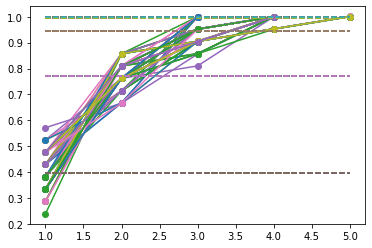

In [8]:
avg_res = avg_deg_cdf(g, 100)

fig, ax = plt.subplots()

for i in degree_cdf(g,100):
    ax.plot(np.arange(len(i))+1, i, marker="o")
    for j in range(len(list(avg_res.values()))):
        y_mean = [list(avg_res.values())[j]]*len(list(avg_res.values()))
        ax.plot(list(avg_res), y_mean, linestyle="--")

In [42]:
avg_res

{1: 0.3948, 2: 0.7729, 3: 0.9395, 4: 0.9945, 5: 1.0}

### Script test 7/15/2022
#### Performance test

In [8]:
# Requirement: Create the same plot but showing the histogram of the degree distribution instead of the CDF

g = nx.to_scipy_sparse_matrix(nx.complete_graph(21))
avg_res = avg_deg_cdf(g, 100)

In [9]:
def degree_freq_cdf(g, n):
    '''To calculate the degree of all vertices of a tree, take a look at the CDF of the degrees, aggregating over all
    randomly-generated spanning trees'''
    cdf_mat = []
    deg_feq = []
    
    # Generate n spanning tree from the original graph, g.
    for _ in range(n):
        sample_tree = sample_spanning_tree(g)
        
        # For each tree, compute degrees and sort them.
        degrees = []
        for i in sample_tree[0]:
            degrees.append(sum(i))
        degrees_seq = sorted(degrees)
        deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
        deg_feq.append(deg_counter)
        
        # Look at how PMF and CDF of the degrees looks, collect all degree CDF from individual spanning tree.
        pmf_dict = {}

        for i in range(1, max(deg_counter)+1):
            pmf_dict[i] = round(deg_counter.get(i, 0)/len(degrees_seq), 3) # If there's no specific num of node, use zero.
        pmf = list(pmf_dict.values())
        cdf = np.cumsum(pmf)
        cdf_mat.append(cdf)
        
    return deg_feq, cdf_mat, degrees_seq

In [10]:
x = degree_freq_cdf(g,1)
print(x[0])
print('\n')
print(x[1])

[Counter({1: 8, 2: 8, 3: 4, 4: 1})]


[array([0.381, 0.762, 0.952, 1.   ])]


In [11]:
def avg_deg_freq(g, ntrees):
    res = []
    x = degree_freq_cdf(g, ntrees) # Get the degree distribution after generating random spanning trees

    for i in x[0]: # [0] indicates degree frequency from previous function
        for j in range(max(i)): # use max index key due to some degree-skipped sample
            if i.get(j+1) == None:
                res.append((j+1, 0))
            else:
                res.append((j+1, i.get(j+1)))

    avg_res = {}
    for key, val in res:
        #avg_res[key] = avg_res.get(key, 0) + val
        avg_res.setdefault(key, []).append(val)        

    for i in avg_res:
        avg_res[i] = round(np.average(avg_res[i]), 4)

    return avg_res, x

[Counter({2: 9, 1: 8, 3: 2, 4: 2}), Counter({2: 12, 1: 6, 3: 2, 4: 1}), Counter({2: 10, 1: 7, 3: 3, 4: 1}), Counter({1: 9, 2: 7, 3: 4, 5: 1}), Counter({1: 10, 2: 5, 3: 4, 4: 2}), Counter({1: 8, 2: 8, 3: 4, 4: 1}), Counter({1: 9, 2: 6, 3: 5, 4: 1}), Counter({1: 8, 2: 7, 3: 6}), Counter({2: 9, 1: 7, 3: 5}), Counter({1: 9, 2: 7, 3: 3, 4: 2})]


[array([0.381, 0.81 , 0.905, 1.   ]), array([0.286, 0.857, 0.952, 1.   ]), array([0.333, 0.809, 0.952, 1.   ]), array([0.429, 0.762, 0.952, 0.952, 1.   ]), array([0.476, 0.714, 0.904, 0.999]), array([0.381, 0.762, 0.952, 1.   ]), array([0.429, 0.715, 0.953, 1.001]), array([0.381, 0.714, 1.   ]), array([0.333, 0.762, 1.   ]), array([0.429, 0.762, 0.905, 1.   ])]


[(1, 8), (2, 9), (3, 2), (4, 2), (1, 6), (2, 12), (3, 2), (4, 1), (1, 7), (2, 10), (3, 3), (4, 1), (1, 9), (2, 7), (3, 4), (4, 0), (5, 1), (1, 10), (2, 5), (3, 4), (4, 2), (1, 8), (2, 8), (3, 4), (4, 1), (1, 9), (2, 6), (3, 5), (4, 1), (1, 8), (2, 7), (3, 6), (1, 7), (2, 9), (3, 5), (1, 9)

In [35]:
avg_deg_freq(g,10)

{1: 7.9, 2: 8.4, 3: 3.8, 4: 1.1667, 5: 0.5, 6: 1.0}

### Script test 7/18/2022

#### Histogram plot

In [12]:
g21 = nx.to_scipy_sparse_matrix(nx.complete_graph(21))
g100 = nx.to_scipy_sparse_matrix(nx.complete_graph(100))

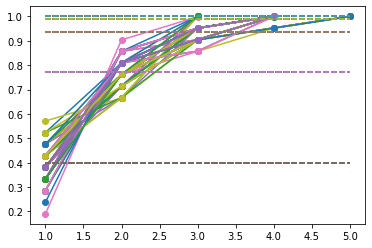

In [13]:
avg_res = avg_deg_cdf(g21, 100)

fig, ax = plt.subplots()

for i in degree_cdf(g,100):
    ax.plot(np.arange(len(i))+1, i, marker="o")
    for j in range(len(list(avg_res.values()))):
        y_mean = [list(avg_res.values())[j]]*len(list(avg_res.values()))
        ax.plot(list(avg_res), y_mean, linestyle="--")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4]


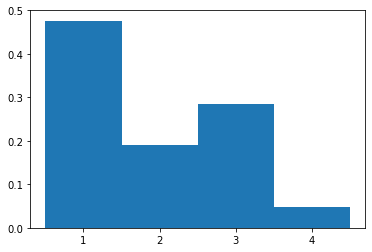

Total execution time =  0.21368908882141113


In [39]:
start = time.time()
x = degree_freq_cdf(g21,20)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4]


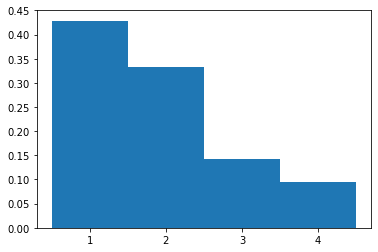

Total execution time =  0.4007148742675781


In [40]:
start = time.time()
x = degree_freq_cdf(g21,50)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4]


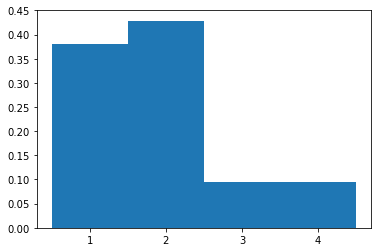

Total execution time =  0.7882881164550781


In [41]:
start = time.time()
x = degree_freq_cdf(g21,100)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6]


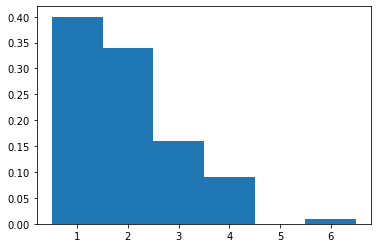

Total execution time =  3.1535210609436035


In [42]:
start = time.time()
x = degree_freq_cdf(g100,20)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 6]


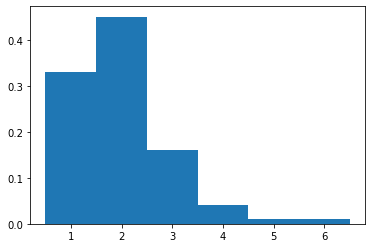

Total execution time =  7.598948001861572


In [43]:
start = time.time()
x = degree_freq_cdf(g100,50)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5]


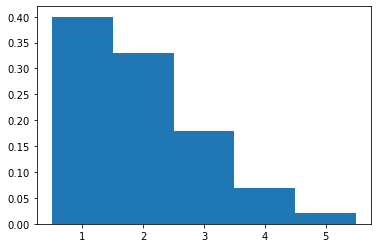

Total execution time =  14.679309129714966


In [44]:
start = time.time()
x = degree_freq_cdf(g100,100)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5]


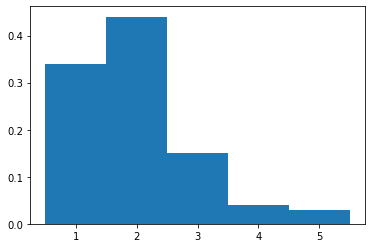

Total execution time =  75.38424396514893


In [45]:
start = time.time()
x = degree_freq_cdf(g100,500)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

### Script test 7/25/2022
#### Histogram characteristics based on vertices n

Histogram plot for n =  10


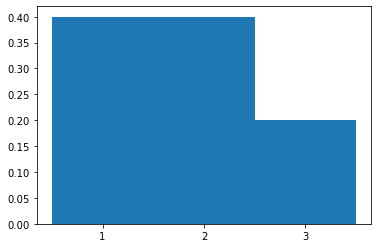

Histogram plot for n =  20


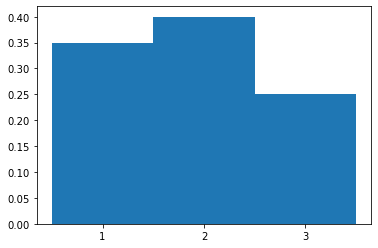

Histogram plot for n =  50


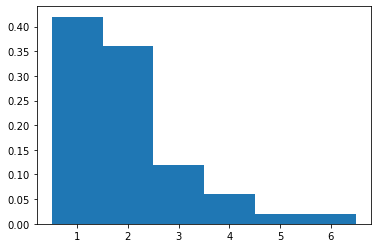

Histogram plot for n =  100


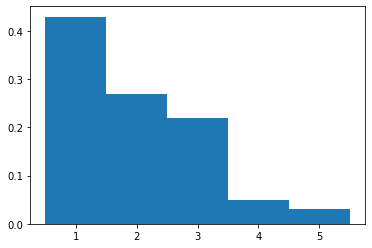

Histogram plot for n =  200


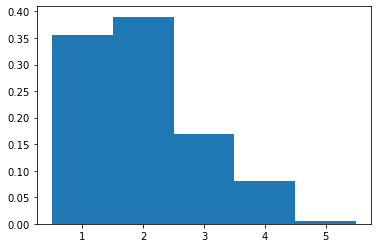

Histogram plot for n =  500


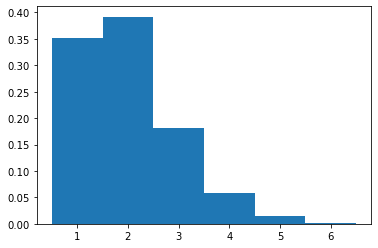

KeyboardInterrupt: 

In [19]:
vertices = [10, 20, 50, 100, 200, 500, 1000, 5000]

start = time.time()

for n in vertices:
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(n))
    deg_list = degree_freq_cdf(g, 100)[2] # 100 replicated spanning trees
    bin_edges = np.arange(0.5, max(deg_list)+1, 1)
    print("Histogram plot for n = ", n)
    plt.hist(deg_list, bins = bin_edges, density = True)
    plt.xticks(np.arange(1, max(deg_list)+1, 1))
    plt.show()
    
end = time.time()
print("Total execution time = ", end-start)